In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
base_url = 'https://www.cars24.com/buy-used-car/?f=make%3A%3D%3Atoyota&sort=bestmatch&serveWarrantyCount=true&listingSource=Homepage_Filters&storeCityId=2378'
r = requests.get(base_url)
htmlContent = r.content
soup = BeautifulSoup(htmlContent,"html.parser")

In [ ]:
data = soup.find_all('a', attrs = {'class':'IIJDn'})
len(data)

19

In [ ]:
all_cars = soup.find_all('h3', attrs={'class':'_11dVb'})
car_data = []
for car in all_cars:
    car_data.append(car.get_text())
car_data

['2012 Toyota Etios Liva G',
 '2018 Toyota YARIS VX MT',
 '2021 Toyota URBAN CRUISER PREMIUM GRADE MT',
 '2011 Toyota Etios Liva G',
 '2022 Toyota URBAN CRUISER PREMIUM GRADE AT',
 '2011 Toyota Etios Liva G',
 '2018 Toyota Corolla Altis VL CVT PETROL',
 '2017 Toyota Corolla Altis VL CVT PETROL',
 '2019 Toyota Glanza G CVT',
 '2018 Toyota Corolla Altis VL CVT PETROL',
 '2020 Toyota Glanza V CVT',
 '2017 Toyota Corolla Altis VL CVT PETROL',
 '2019 Toyota Glanza V CVT',
 '2019 Toyota Glanza G CVT',
 '2011 Toyota Etios Liva G',
 '2021 Toyota URBAN CRUISER HIGH GRADE AT',
 '2012 Toyota Innova 2.5 GX 8 STR',
 '2014 Toyota Etios Liva G',
 '2013 Toyota Etios Liva G']

In [ ]:
car_details = []
for i in range(len(data)):
    other_details = data[i].find_all('li')
    one_car_details = []
    for dtl in other_details:
        if dtl.get_text() == "":
            continue
        details = dtl.get_text()
        one_car_details.append(details)
    car_details.append(one_car_details)
car_details

[['52,656 km', 'Petrol', 'Manual'],
 ['30,509 km', 'Petrol', 'Manual'],
 ['18,001 km', 'Petrol', 'Manual'],
 ['79,643 km', 'Petrol', 'Manual'],
 ['33,986 km', 'Petrol', 'Automatic'],
 ['77,595 km', 'Petrol', 'Manual'],
 ['74,221 km', 'Petrol', 'Automatic'],
 ['56,595 km', 'Petrol', 'Automatic'],
 ['16,870 km', 'Petrol', 'Automatic'],
 ['77,581 km', 'Petrol', 'Automatic'],
 ['56,916 km', 'Petrol', 'Automatic'],
 ['61,520 km', 'Petrol', 'Automatic'],
 ['15,816 km', 'Petrol', 'Automatic'],
 ['21,695 km', 'Petrol', 'Automatic'],
 ['75,420 km', 'Petrol', 'Manual'],
 ['45,799 km', 'Petrol', 'Automatic'],
 ['89,683 km', 'Diesel', 'Manual'],
 ['23,685 km', 'Petrol', 'Manual'],
 ['30,154 km', 'Petrol', 'Manual']]

In [ ]:
all_prices = soup.find_all('strong', attrs={'class':'_3RL-I'})
car_prices = []
for price in all_prices:
    price = price.get_text()
    car_prices.append(price[1:])
car_prices

['2.37 Lakh',
 '7.83 Lakh',
 '9.57 Lakh',
 '2.33 Lakh',
 '10.11 Lakh',
 '2.47 Lakh',
 '9.78 Lakh',
 '10.33 Lakh',
 '6.79 Lakh',
 '9.80 Lakh',
 '7.13 Lakh',
 '10.21 Lakh',
 '7.93 Lakh',
 '7.28 Lakh',
 '2.58 Lakh',
 '9.89 Lakh',
 '6.60 Lakh',
 '3.33 Lakh',
 '2.51 Lakh']

In [ ]:
all_locations = soup.find_all('p', attrs={'class':'_3dGMY'})
car_locations = []
for ltn in all_locations:
    location = ltn.find_all('span')
    location = location[-1].get_text(strip=True)
    car_locations.append(location)
car_locations

['Goregaon, Mumbai',
 'Goregaon, Mumbai',
 'Goregaon, Mumbai',
 'Mulund West, Mumbai',
 'Seawood',
 'Seawood',
 'Mulund West, Mumbai',
 'Mulund West, Mumbai',
 'Seawood',
 'Mulund West, Mumbai',
 'Goregaon, Mumbai',
 'Mulund West, Mumbai',
 'Goregaon, Mumbai',
 'Seawood',
 'Goregaon, Mumbai',
 'Goregaon, Mumbai',
 'Goregaon, Mumbai']

In [ ]:
spl_features = soup.find_all('span', attrs = {'class':'_3JoYA'})
car_spl_features = []
for feature in spl_features:
    car_spl_features.append(feature.get_text())
car_spl_features

['City Driven',
 'Top Model',
 'Top Model',
 'City Driven',
 'Top Model',
 'City Driven',
 'Alloy Wheels',
 'Alloy Wheels',
 'Alloy Wheels',
 'Alloy Wheels',
 'Top Model',
 'Alloy Wheels',
 'Top Model',
 'Alloy Wheels',
 '100% Tyre Life',
 'Alloy Wheels',
 '100% Tyre Life',
 'Reg. Serviced',
 'Reg. Serviced']

In [ ]:
all_car_details_df = []
for i in range(len(data)):
    car_details_df = []
#     splitting car year and car name into two parts then adding it to list
    try:
        car_dt = car_data[i].split(" ")
        year = car_dt[0]
        model = " ".join(car_dt[1:])
        car_details_df = [year, model]
    except IndexError:
        year = "Not Available"
        model = "Not Available"

#     adding car km driven, fuel type and transmission type into the list
    try:
        details = car_details[i]
        km = details[0].split(" ")
        km = km[0]
        km = int(km.replace(",", ""))
        details[0] = km
        car_details_df.extend(details)
    except IndexError:
        car_details_df.extend(["Not Available", "Not Available", "Not Available"])

#     adding price to the list
    try:
        price = car_prices[i].split(" ")
        price = price[0]
        car_details_df.append(price)
    except IndexError:
        car_details_df.append("Not Available")

#     adding location to the list
    try:
        car_details_df.append(car_locations[i])
    except IndexError:
        car_details_df.append("Not Available")

#     adding car features to the list
    try:
        car_details_df.append(car_spl_features[i])
    except IndexError:
        car_details_df.append("Not Available")

#     appending all the details found foound one car into the list
    all_car_details_df.append(car_details_df)

all_car_details_df

[['2012',
  'Toyota Etios Liva G',
  52656,
  'Petrol',
  'Manual',
  '2.37',
  'Goregaon, Mumbai',
  'City Driven'],
 ['2018',
  'Toyota YARIS VX MT',
  30509,
  'Petrol',
  'Manual',
  '7.83',
  'Goregaon, Mumbai',
  'Top Model'],
 ['2021',
  'Toyota URBAN CRUISER PREMIUM GRADE MT',
  18001,
  'Petrol',
  'Manual',
  '9.57',
  'Goregaon, Mumbai',
  'Top Model'],
 ['2011',
  'Toyota Etios Liva G',
  79643,
  'Petrol',
  'Manual',
  '2.33',
  'Mulund West, Mumbai',
  'City Driven'],
 ['2022',
  'Toyota URBAN CRUISER PREMIUM GRADE AT',
  33986,
  'Petrol',
  'Automatic',
  '10.11',
  'Seawood',
  'Top Model'],
 ['2011',
  'Toyota Etios Liva G',
  77595,
  'Petrol',
  'Manual',
  '2.47',
  'Seawood',
  'City Driven'],
 ['2018',
  'Toyota Corolla Altis VL CVT PETROL',
  74221,
  'Petrol',
  'Automatic',
  '9.78',
  'Mulund West, Mumbai',
  'Alloy Wheels'],
 ['2017',
  'Toyota Corolla Altis VL CVT PETROL',
  56595,
  'Petrol',
  'Automatic',
  '10.33',
  'Mulund West, Mumbai',
  'Alloy Whe

In [ ]:
all_car_details_df = pd.DataFrame(all_car_details_df, columns = ['Year', 'Car Model', 'KM Driven',
                                                                 'Fuel Type', 'Transmission Type',
                                                                 'Price(in Lakhs)','Location', 'Car Features'])
all_car_details_df.head()

,Year,Car Model,KM Driven,Fuel Type,Transmission Type,Price(in Lakhs),Location,Car Features
0,2012,Toyota Etios Liva G,52656,Petrol,Manual,2.37,"Goregaon, Mumbai",City Driven
1,2018,Toyota YARIS VX MT,30509,Petrol,Manual,7.83,"Goregaon, Mumbai",Top Model
2,2021,Toyota URBAN CRUISER PREMIUM GRADE MT,18001,Petrol,Manual,9.57,"Goregaon, Mumbai",Top Model
3,2011,Toyota Etios Liva G,79643,Petrol,Manual,2.33,"Mulund West, Mumbai",City Driven
4,2022,Toyota URBAN CRUISER PREMIUM GRADE AT,33986,Petrol,Automatic,10.11,Seawood,Top Model


In [ ]:
# changing the datatypes for some columns
all_car_details_df['Price(in Lakhs)'] = all_car_details_df['Price(in Lakhs)'].astype('float')
all_car_details_df['KM Driven'] = all_car_details_df['KM Driven'].astype('int')

In [ ]:
all_car_details_df.to_csv('Cars24.csv', index = False)

In [ ]:
all_car_details_df.describe(include = 'all')

,Year,Car Model,KM Driven,Fuel Type,Transmission Type,Price(in Lakhs),Location,Car Features
count,19,19,19.000000,19,19,19.000000,19,19
unique,10,9,NaN,2,2,NaN,4,5
top,2018,Toyota Etios Liva G,NaN,Petrol,Automatic,NaN,"Goregaon, Mumbai",Alloy Wheels
freq,3,6,NaN,18,10,NaN,8,7
mean,NaN,NaN,49386.578947,NaN,NaN,6.781053,NaN,NaN
std,NaN,NaN,25015.559115,NaN,NaN,3.157574,NaN,NaN
min,NaN,NaN,15816.000000,NaN,NaN,2.330000,NaN,NaN
25%,NaN,NaN,26919.500000,NaN,NaN,2.955000,NaN,NaN
50%,NaN,NaN,52656.000000,NaN,NaN,7.280000,NaN,NaN
75%,NaN,NaN,74820.500000,NaN,NaN,9.790000,NaN,NaN


In [ ]:
all_car_details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               19 non-null     object 
 1   Car Model          19 non-null     object 
 2   KM Driven          19 non-null     int64  
 3   Fuel Type          19 non-null     object 
 4   Transmission Type  19 non-null     object 
 5   Price(in Lakhs)    19 non-null     float64
 6   Location           19 non-null     object 
 7   Car Features       19 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.3+ KB


In [ ]:
# sns.displot(all_car_details_df['Price(in Lakhs)'], kind='hist')
# plt.xlabel('Car Price')
# plt.ylabel('Frequency')
# plt.title('Distribution of Car Prices')
# plt.show()

In [ ]:
fuel_type_count = (all_car_details_df.groupby(['Fuel Type'], as_index = False,)
                   .agg(Count = ('Fuel Type', 'count')))
fuel_type_count

,Fuel Type,Count
0,Diesel,1
1,Petrol,18


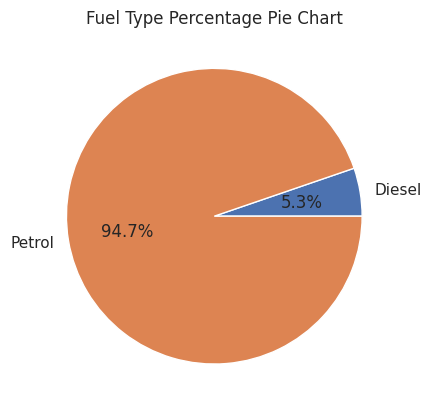

In [ ]:
labels = fuel_type_count['Fuel Type'].values
sizes = fuel_type_count['Count'].values
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Fuel Type Percentage Pie Chart")
plt.show()

In [ ]:
trans_type_count = (all_car_details_df.groupby(['Transmission Type'], as_index = False,)
                    .agg(Count = ('Transmission Type', 'count')))
trans_type_count

,Transmission Type,Count
0,Automatic,10
1,Manual,9


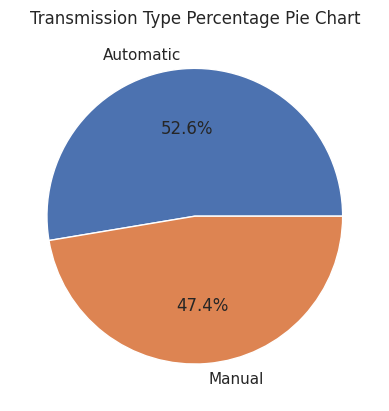

In [ ]:
labels = trans_type_count['Transmission Type'].values
sizes = trans_type_count['Count'].values
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Transmission Type Percentage Pie Chart")
plt.show()

In [ ]:
all_car_details_df['Trans Fuel Type'] = all_car_details_df['Transmission Type'] + str("-") + all_car_details_df['Fuel Type']
all_car_details_df.head()

,Year,Car Model,KM Driven,Fuel Type,Transmission Type,Price(in Lakhs),Location,Car Features,Trans Fuel Type
0,2012,Toyota Etios Liva G,52656,Petrol,Manual,2.37,"Goregaon, Mumbai",City Driven,Manual-Petrol
1,2018,Toyota YARIS VX MT,30509,Petrol,Manual,7.83,"Goregaon, Mumbai",Top Model,Manual-Petrol
2,2021,Toyota URBAN CRUISER PREMIUM GRADE MT,18001,Petrol,Manual,9.57,"Goregaon, Mumbai",Top Model,Manual-Petrol
3,2011,Toyota Etios Liva G,79643,Petrol,Manual,2.33,"Mulund West, Mumbai",City Driven,Manual-Petrol
4,2022,Toyota URBAN CRUISER PREMIUM GRADE AT,33986,Petrol,Automatic,10.11,Seawood,Top Model,Automatic-Petrol


In [ ]:
trans_fuel_type_count = (all_car_details_df.groupby(['Trans Fuel Type'], as_index = False,)
                         .agg(Count = ('Trans Fuel Type', 'count')))
trans_fuel_type_count

,Trans Fuel Type,Count
0,Automatic-Petrol,10
1,Manual-Diesel,1
2,Manual-Petrol,8


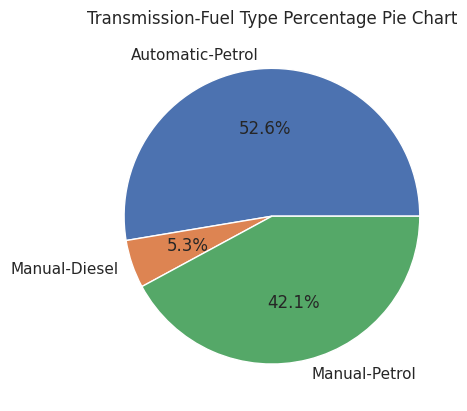

In [ ]:
labels = trans_fuel_type_count['Trans Fuel Type'].values
sizes = trans_fuel_type_count['Count'].values
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Transmission-Fuel Type Percentage Pie Chart")
plt.show()

In [ ]:
location_count = (all_car_details_df.groupby(['Location'], as_index = False,)
                         .agg(Count = ('Location', 'count')))
location_count

,Location,Count
0,"Goregaon, Mumbai",8
1,"Mulund West, Mumbai",5
2,Not Available,2
3,Seawood,4


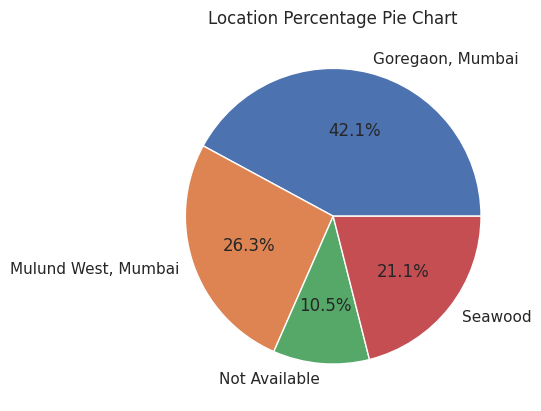

In [ ]:
labels = location_count['Location'].values
sizes = location_count['Count'].values
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Location Percentage Pie Chart")
plt.show()

In [ ]:
car_features = (all_car_details_df.groupby(['Car Features'], as_index = False,)
                         .agg(Count = ('Car Features', 'count')))
car_features

,Car Features,Count
0,100% Tyre Life,2
1,Alloy Wheels,7
2,City Driven,3
3,Reg. Serviced,2
4,Top Model,5


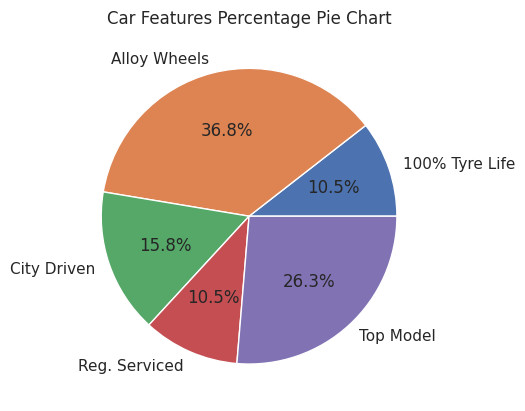

In [ ]:
labels = car_features['Car Features'].values
sizes = car_features['Count'].values
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Car Features Percentage Pie Chart")
plt.show()

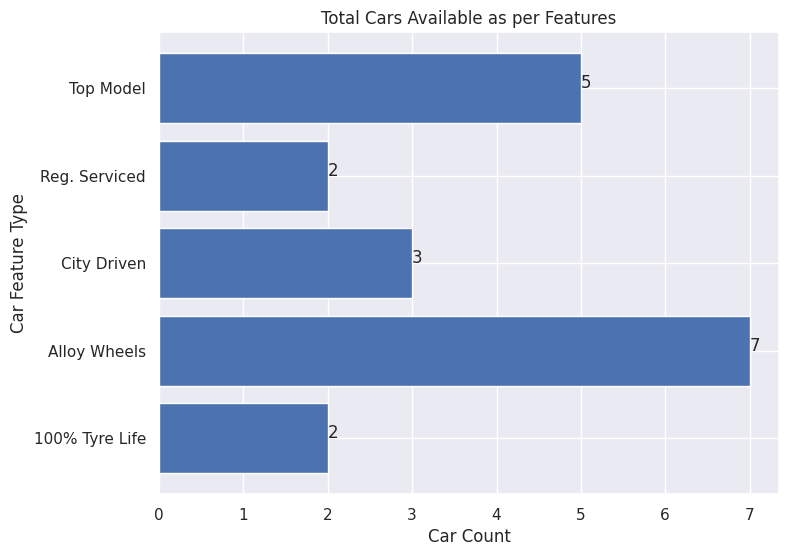

In [ ]:
plt.figure(figsize=(8,6))
labels = car_features['Car Features'].values
sizes = car_features['Count'].values
plt.barh(labels, sizes)
plt.xlabel('Car Count')
plt.ylabel('Car Feature Type')
plt.title('Total Cars Available as per Features')

for index, value in enumerate(sizes):
    plt.text(value, index,
             str(value))

plt.show()

In [ ]:
avg_price_fuel_type = (all_car_details_df.groupby(['Fuel Type'], as_index = False,)
                         .agg(Avg_Price = ('Price(in Lakhs)', 'mean')))
avg_price_fuel_type

,Fuel Type,Avg_Price
0,Diesel,6.600000
1,Petrol,6.791111


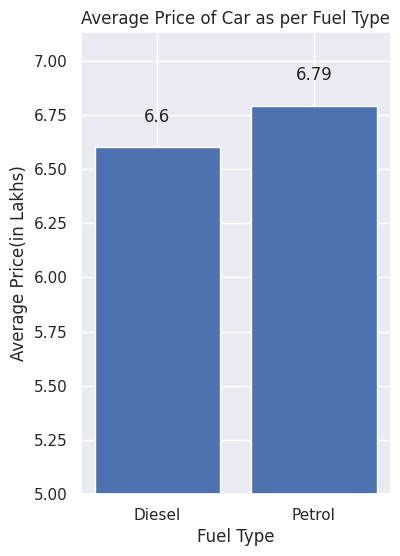

In [ ]:
plt.figure(figsize=(4,6))
labels = avg_price_fuel_type['Fuel Type'].values
sizes = avg_price_fuel_type['Avg_Price'].values
plt.bar(labels, sizes)
plt.xlabel('Fuel Type')
plt.ylabel('Average Price(in Lakhs)')
plt.title('Average Price of Car as per Fuel Type')
plt.ylim(5)

for index, value in enumerate(sizes):
    plt.text(index, value + 0.1, str(value.round(2)), ha='center', va='bottom', fontsize=12)

plt.show()

In [ ]:
avg_price_trans_type = (all_car_details_df.groupby(['Transmission Type'], as_index = False,)
                         .agg(Avg_Price = ('Price(in Lakhs)', 'mean')))
avg_price_trans_type

,Transmission Type,Avg_Price
0,Automatic,8.925000
1,Manual,4.398889


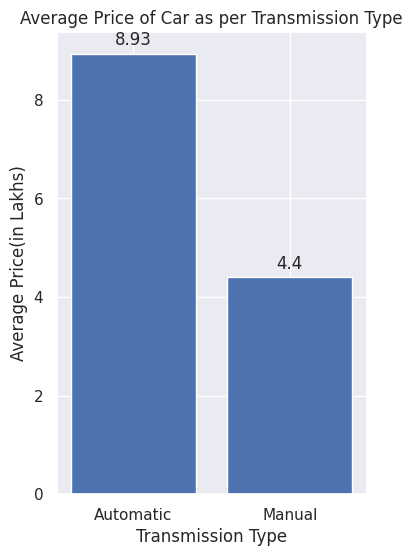

In [ ]:
plt.figure(figsize=(4,6))
labels = avg_price_trans_type['Transmission Type'].values
sizes = avg_price_trans_type['Avg_Price'].values
plt.bar(labels, sizes)
plt.xlabel('Transmission Type')
plt.ylabel('Average Price(in Lakhs)')
plt.title('Average Price of Car as per Transmission Type')

for index, value in enumerate(sizes):
    plt.text(index, value + 0.1, str(value.round(2)), ha='center', va='bottom', fontsize=12)

plt.show()

In [ ]:
avg_price_trans_fuel_type = (all_car_details_df.groupby(['Trans Fuel Type'], as_index = False,)
                         .agg(Avg_Price = ('Price(in Lakhs)', 'mean')))
avg_price_trans_fuel_type

,Trans Fuel Type,Avg_Price
0,Automatic-Petrol,8.92500
1,Manual-Diesel,6.60000
2,Manual-Petrol,4.12375


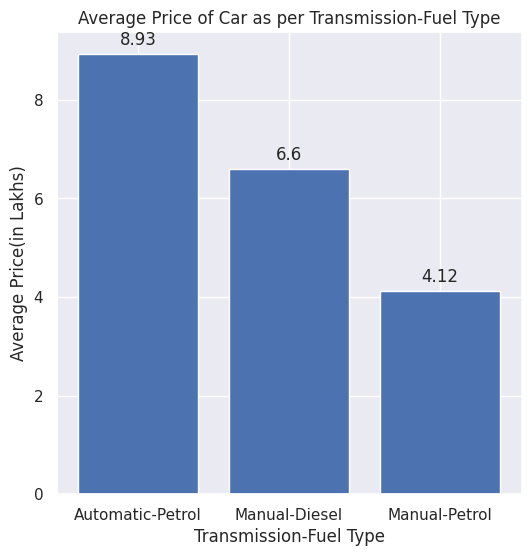

In [ ]:
plt.figure(figsize=(6,6))
labels = avg_price_trans_fuel_type['Trans Fuel Type'].values
sizes = avg_price_trans_fuel_type['Avg_Price'].values
plt.bar(labels, sizes)
plt.xlabel('Transmission-Fuel Type')
plt.ylabel('Average Price(in Lakhs)')
plt.title('Average Price of Car as per Transmission-Fuel Type')

for index, value in enumerate(sizes):
    plt.text(index, value + 0.1, str(value.round(2)), ha='center', va='bottom', fontsize=12)

plt.show()

In [ ]:
avg_driven_trans_type = (all_car_details_df.groupby(['Transmission Type'], as_index = False,)
                         .agg(Avg_Driven = ('KM Driven', 'mean')))
avg_driven_trans_type

,Transmission Type,Avg_Driven
0,Automatic,46099.900000
1,Manual,53038.444444


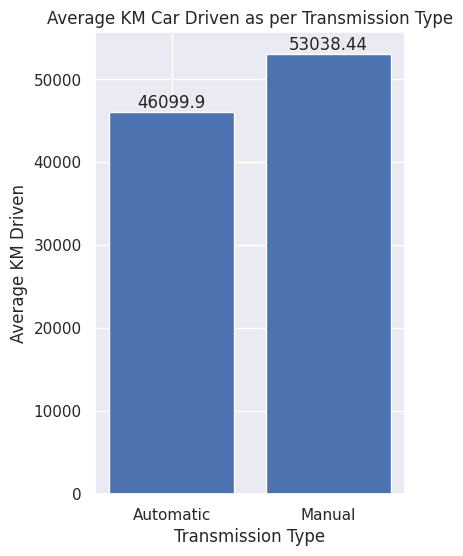

In [ ]:
plt.figure(figsize=(4,6))
labels = avg_driven_trans_type['Transmission Type'].values
sizes = avg_driven_trans_type['Avg_Driven'].values
plt.bar(labels, sizes)
plt.xlabel('Transmission Type')
plt.ylabel('Average KM Driven')
plt.title('Average KM Car Driven as per Transmission Type')

for index, value in enumerate(sizes):
    plt.text(index, value + 0.1, str(value.round(2)), ha='center', va='bottom', fontsize=12)

plt.show()

In [ ]:
avg_driven_fuel_type = (all_car_details_df.groupby(['Fuel Type'], as_index = False,)
                         .agg(Avg_Driven = ('KM Driven', 'mean')))
avg_driven_fuel_type

,Fuel Type,Avg_Driven
0,Diesel,89683.000000
1,Petrol,47147.888889


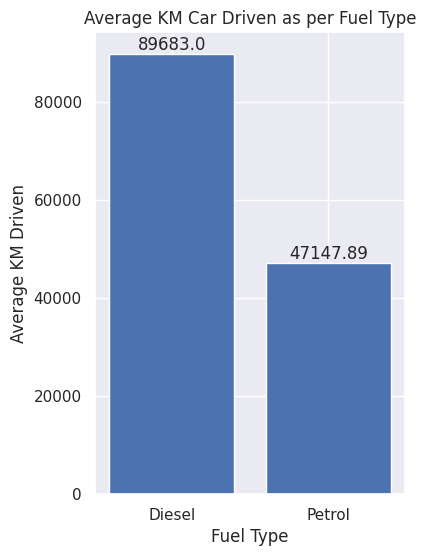

In [ ]:
plt.figure(figsize=(4,6))
labels = avg_driven_fuel_type['Fuel Type'].values
sizes = avg_driven_fuel_type['Avg_Driven'].values
plt.bar(labels, sizes)
plt.xlabel('Fuel Type')
plt.ylabel('Average KM Driven')
plt.title('Average KM Car Driven as per Fuel Type')

for index, value in enumerate(sizes):
    plt.text(index, value + 0.1, str(value.round(2)), ha='center', va='bottom', fontsize=12)

plt.show()

In [ ]:
avg_driven_trans_fuel_type = (all_car_details_df.groupby(['Trans Fuel Type'], as_index = False,)
                         .agg(Avg_Driven = ('KM Driven', 'mean')))
avg_driven_trans_fuel_type

,Trans Fuel Type,Avg_Driven
0,Automatic-Petrol,46099.900
1,Manual-Diesel,89683.000
2,Manual-Petrol,48457.875


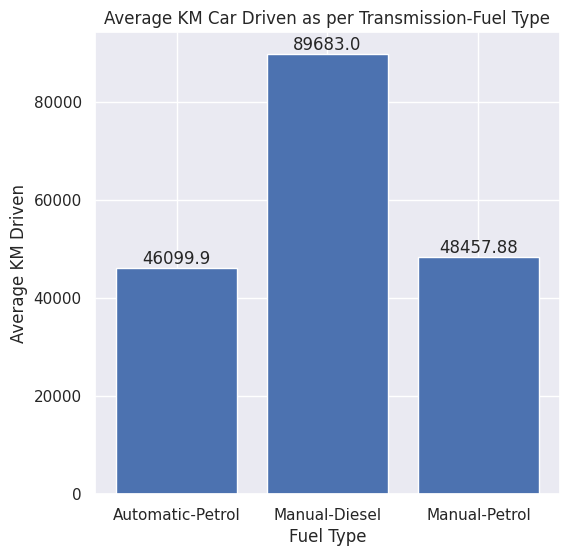

In [ ]:
plt.figure(figsize=(6,6))
labels = avg_driven_trans_fuel_type['Trans Fuel Type'].values
sizes = avg_driven_trans_fuel_type['Avg_Driven'].values
plt.bar(labels, sizes)
plt.xlabel('Fuel Type')
plt.ylabel('Average KM Driven')
plt.title('Average KM Car Driven as per Transmission-Fuel Type')

for index, value in enumerate(sizes):
    plt.text(index, value + 0.1, str(value.round(2)), ha='center', va='bottom', fontsize=12)

plt.show()

In [ ]:
avg_year_price = (all_car_details_df.groupby(['Year'], as_index = False,)
                         .agg(Avg_Price = ('Price(in Lakhs)', 'mean')))
avg_year_price

,Year,Avg_Price
0,2011,2.460000
1,2012,4.485000
2,2013,2.510000
3,2014,3.330000
4,2017,10.270000
5,2018,9.136667
6,2019,7.333333
7,2020,7.130000
8,2021,9.730000
9,2022,10.110000


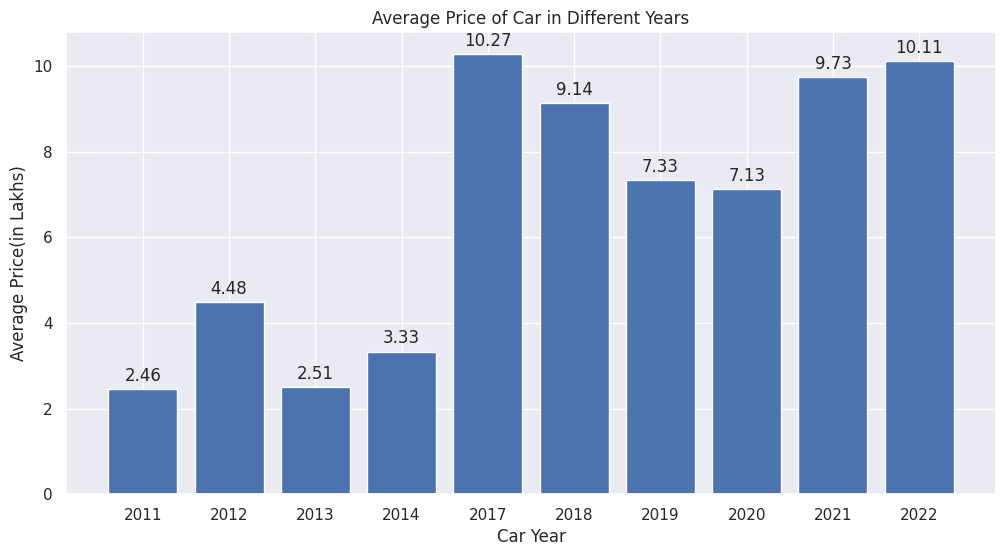

In [ ]:
plt.figure(figsize=(12,6))
labels = avg_year_price['Year'].values
sizes = avg_year_price['Avg_Price'].values
plt.bar(labels, sizes)
plt.xlabel('Car Year')
plt.ylabel('Average Price(in Lakhs)')
plt.title('Average Price of Car in Different Years')

for index, value in enumerate(sizes):
    plt.text(index, value + 0.1, str(value.round(2)), ha='center', va='bottom', fontsize=12)

plt.show()

In [ ]:
avg_year_driven = (all_car_details_df.groupby(['Year'], as_index = False,)
                         .agg(Avg_Driven = ('KM Driven', 'mean')))
avg_year_driven

,Year,Avg_Driven
0,2011,77552.666667
1,2012,71169.500000
2,2013,30154.000000
3,2014,23685.000000
4,2017,59057.500000
5,2018,60770.333333
6,2019,18127.000000
7,2020,56916.000000
8,2021,31900.000000
9,2022,33986.000000


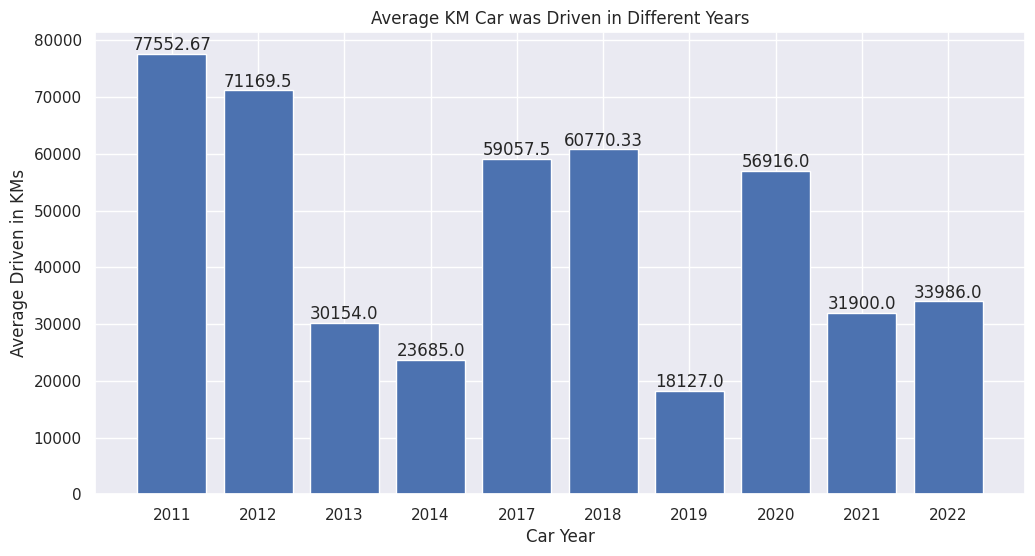

In [ ]:
plt.figure(figsize=(12,6))
labels = avg_year_driven['Year'].values
sizes = avg_year_driven['Avg_Driven'].values
plt.bar(labels, sizes)
plt.xlabel('Car Year')
plt.ylabel('Average Driven in KMs')
plt.title('Average KM Car was Driven in Different Years')

for index, value in enumerate(sizes):
    plt.text(index, value + 0.1, str(value.round(2)), ha='center', va='bottom', fontsize=12)

plt.show()

In [ ]:
avg_car_driven = (all_car_details_df.groupby(['Car Model'], as_index = False,)
                         .agg(Avg_Driven = ('KM Driven', 'mean')))
avg_car_driven

,Car Model,Avg_Driven
0,Toyota Corolla Altis VL CVT PETROL,67479.25
1,Toyota Etios Liva G,56525.50
2,Toyota Glanza G CVT,19282.50
3,Toyota Glanza V CVT,36366.00
4,Toyota Innova 2.5 GX 8 STR,89683.00
5,Toyota URBAN CRUISER HIGH GRADE AT,45799.00
6,Toyota URBAN CRUISER PREMIUM GRADE AT,33986.00
7,Toyota URBAN CRUISER PREMIUM GRADE MT,18001.00
8,Toyota YARIS VX MT,30509.00


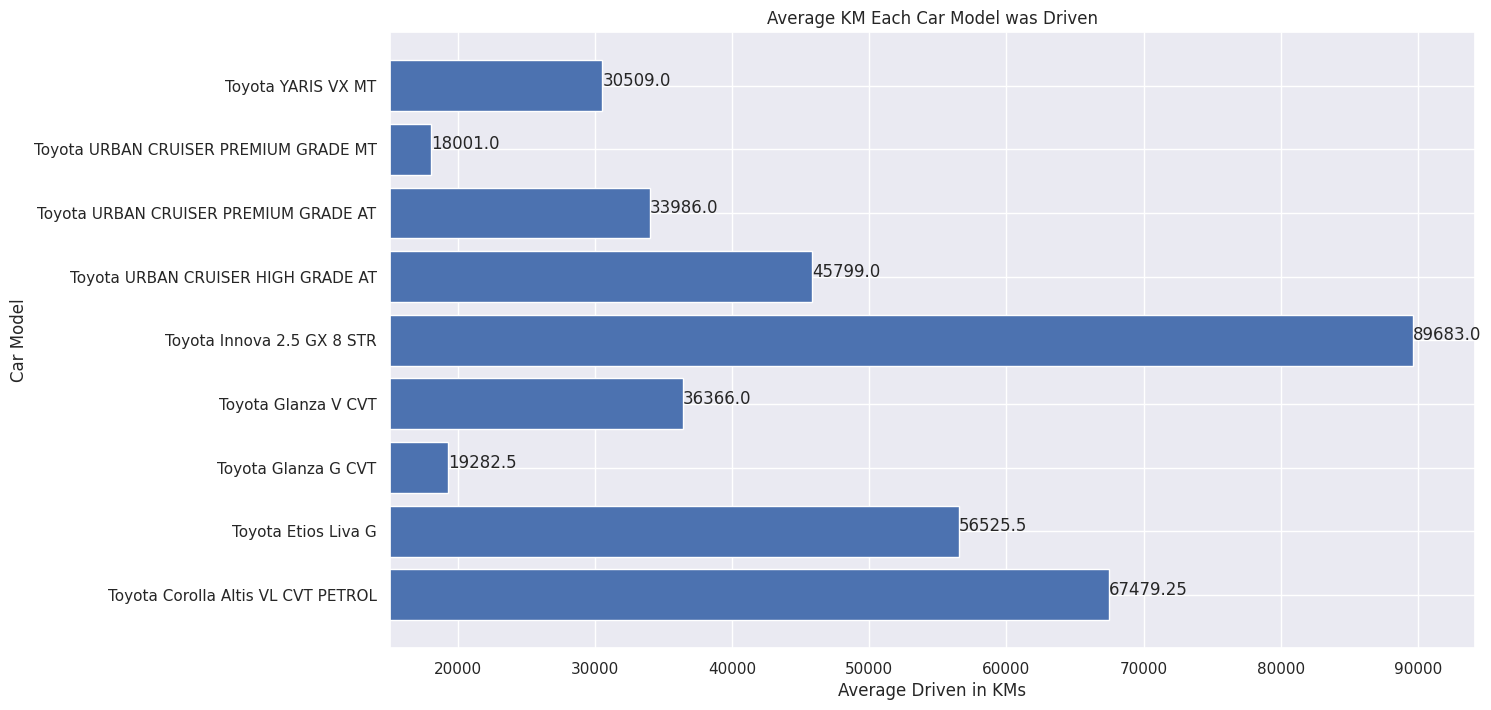

In [ ]:
plt.figure(figsize=(14,8))
labels = avg_car_driven['Car Model'].values
sizes = avg_car_driven['Avg_Driven'].values
plt.barh(labels, sizes)
plt.xlabel('Average Driven in KMs')
plt.ylabel('Car Model')
plt.title('Average KM Each Car Model was Driven')
plt.xlim(15000)

for index, value in enumerate(sizes):
    plt.text(value, index,
             str(value))

plt.show()

In [ ]:
avg_car_price_year = (all_car_details_df.groupby(['Car Model','Year'], as_index = False)
                         .agg(Avg_Price = ('Price(in Lakhs)', 'mean')))
avg_car_price_year

,Car Model,Year,Avg_Price
0,Toyota Corolla Altis VL CVT PETROL,2017,10.270
1,Toyota Corolla Altis VL CVT PETROL,2018,9.790
2,Toyota Etios Liva G,2011,2.460
3,Toyota Etios Liva G,2012,2.370
4,Toyota Etios Liva G,2013,2.510
5,Toyota Etios Liva G,2014,3.330
6,Toyota Glanza G CVT,2019,7.035
7,Toyota Glanza V CVT,2019,7.930
8,Toyota Glanza V CVT,2020,7.130
9,Toyota Innova 2.5 GX 8 STR,2012,6.600


In [ ]:
# for model in avg_car_price_year['Car Model'].unique():
#     model_data = avg_car_price_year[avg_car_price_year['Car Model'] == model]  # Filter data for each model

#     # Create a subplot for each car model
#     fig, ax = plt.subplots(figsize=(4,4))

#     # Scatter plot of Model Year vs. Price
#     sns.scatterplot(x='Year', y='Avg_Price', data=model_data, hue='Car Model', ax=ax)

#     # Customize the plot
#     plt.title(f'Model Year vs. Price for {model}')
#     plt.xlabel('Model Year')
#     plt.ylabel('Price')
#     plt.grid(True)

#     # Adjust layout for multiple subplots (optional)
#     plt.tight_layout()
#
# plt.show()